# Final Project

In this project, our aim is to building a model for predicting dimond prices. Our label (output) will be `price` column. **Do not forget, this is a Classification problem!**

## Content
carat: weight of the diamond (0.2--5.01)

cut: quality of the cut (Fair, Good, Very Good, Premium, Ideal)

color: diamond colour, from J (worst) to D (best)

clarity: a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))

x: length in mm (0--10.74)

y: width in mm (0--58.9)

z: depth in mm (0--31.8)

depth: total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)

table: width of top of diamond relative to widest point (43--95)

## Steps
- Read the `diamonds.csv` file and describe it.
- Make at least 4 different analysis on Exploratory Data Analysis section.
- Pre-process the dataset to get ready for ML application. (Check missing data and handle them, can we need to do scaling or feature extraction etc.)
- Define appropriate evaluation metric for our case (classification). *Hint: Is there any imbalanced problem in the label column?*
- Split the dataset into train and test set. (Consider the imbalanced problem if is there any). Check the distribution of labels in the subsets (train and test).
- Train and evaluate Decision Trees and at least 2 different appropriate algorithm which you can choose from scikit-learn library.
- Is there any overfitting and underfitting? Interpret your results and try to overcome if there is any problem in a new section.
- Create confusion metrics for each algorithm and display Accuracy, Recall, Precision and F1-Score values.
- Analyse and compare results of 3 algorithms.
- Select best performing model based on evaluation metric you chose on test dataset.


Good luck :)

<h2>Your Name</h2>

# Data

In [12]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

import warnings

warnings.filterwarnings("ignore")

In [33]:
# Read csv
df = pd.read_csv('diamonds.csv')
del df['index']
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43,Very Low
1,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31,Very Low
2,0.23,Good,E,VS1,56.9,65.0,4.05,4.07,2.31,Very Low
3,0.29,Premium,I,VS2,62.4,58.0,4.20,4.23,2.63,Very Low
4,0.31,Good,J,SI2,63.3,58.0,4.34,4.35,2.75,Very Low


In [34]:
# Describe our data for each feature and use .info() for get information about our dataset
# Analyse missing values
df.describe()

,carat,depth,table,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,10.740000,58.900000,31.800000


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   x        53940 non-null  float64
 7   y        53940 non-null  float64
 8   z        53940 non-null  float64
 9   price    53940 non-null  object 
dtypes: float64(6), object(4)
memory usage: 4.1+ MB


In [36]:
print(df.duplicated().sum())
print(df.isna().sum())

342
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64


In [37]:
df_new=df[df.duplicated()==False]
df_new.shape

(53598, 10)

# Exploratory Data Analysis

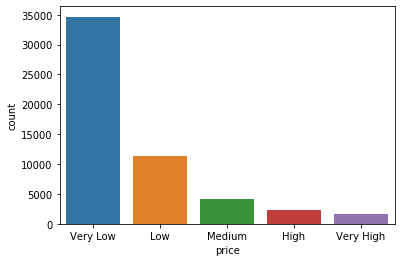

In [28]:
# Our label Distribution (countplot)
sns.countplot(x ='price', data = df)

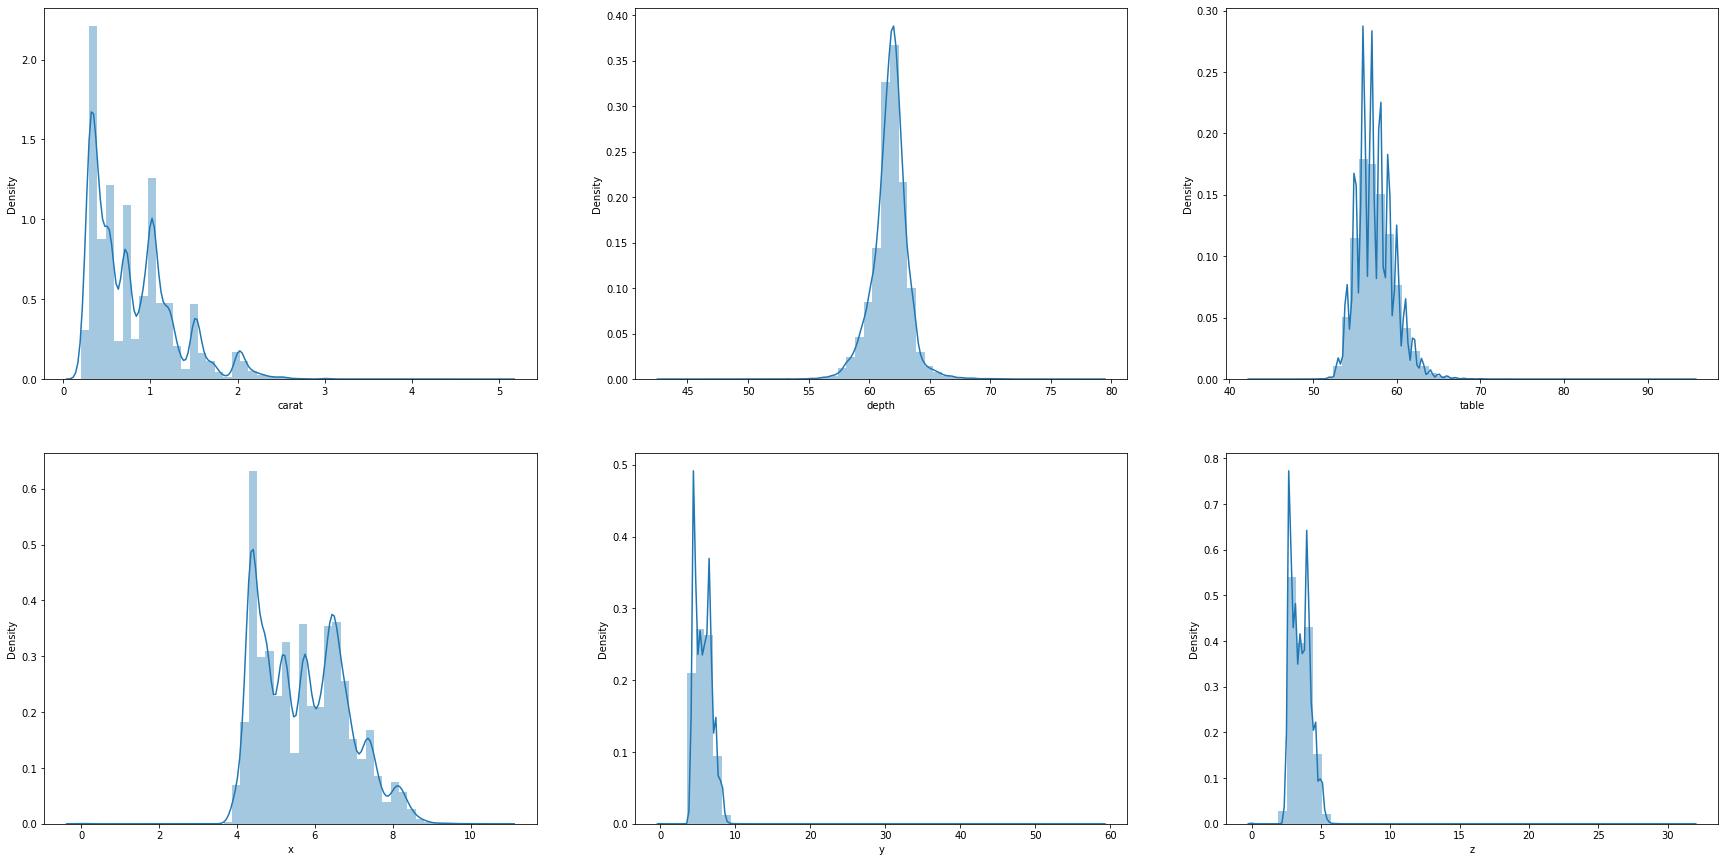

In [40]:
# Example EDA (distplot)
plt.subplots(figsize=(30,15))
for i, column in enumerate(df_new.describe().columns, 1):
    plt.subplot(2,3,i)
    sns.distplot(df_new[column])

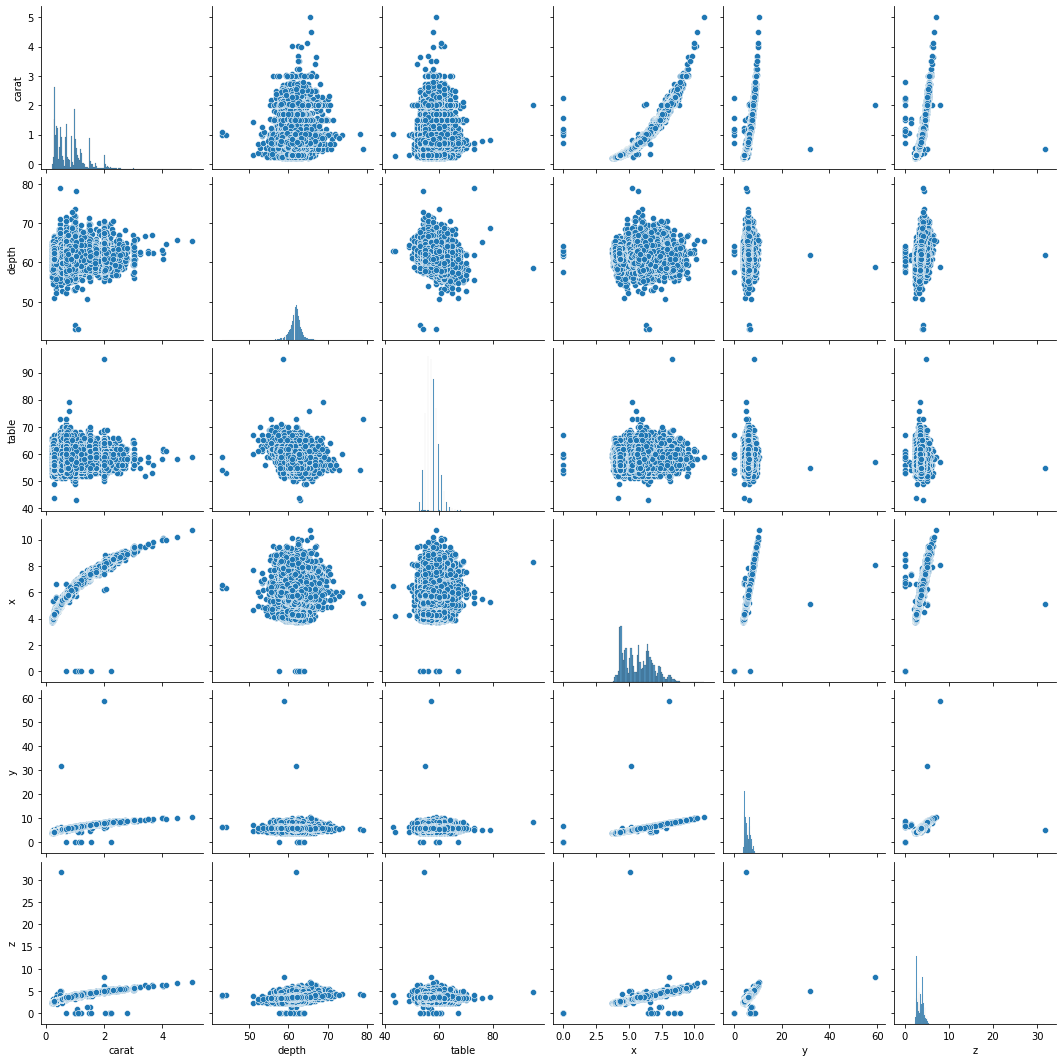

In [41]:
sns.pairplot(df_new)

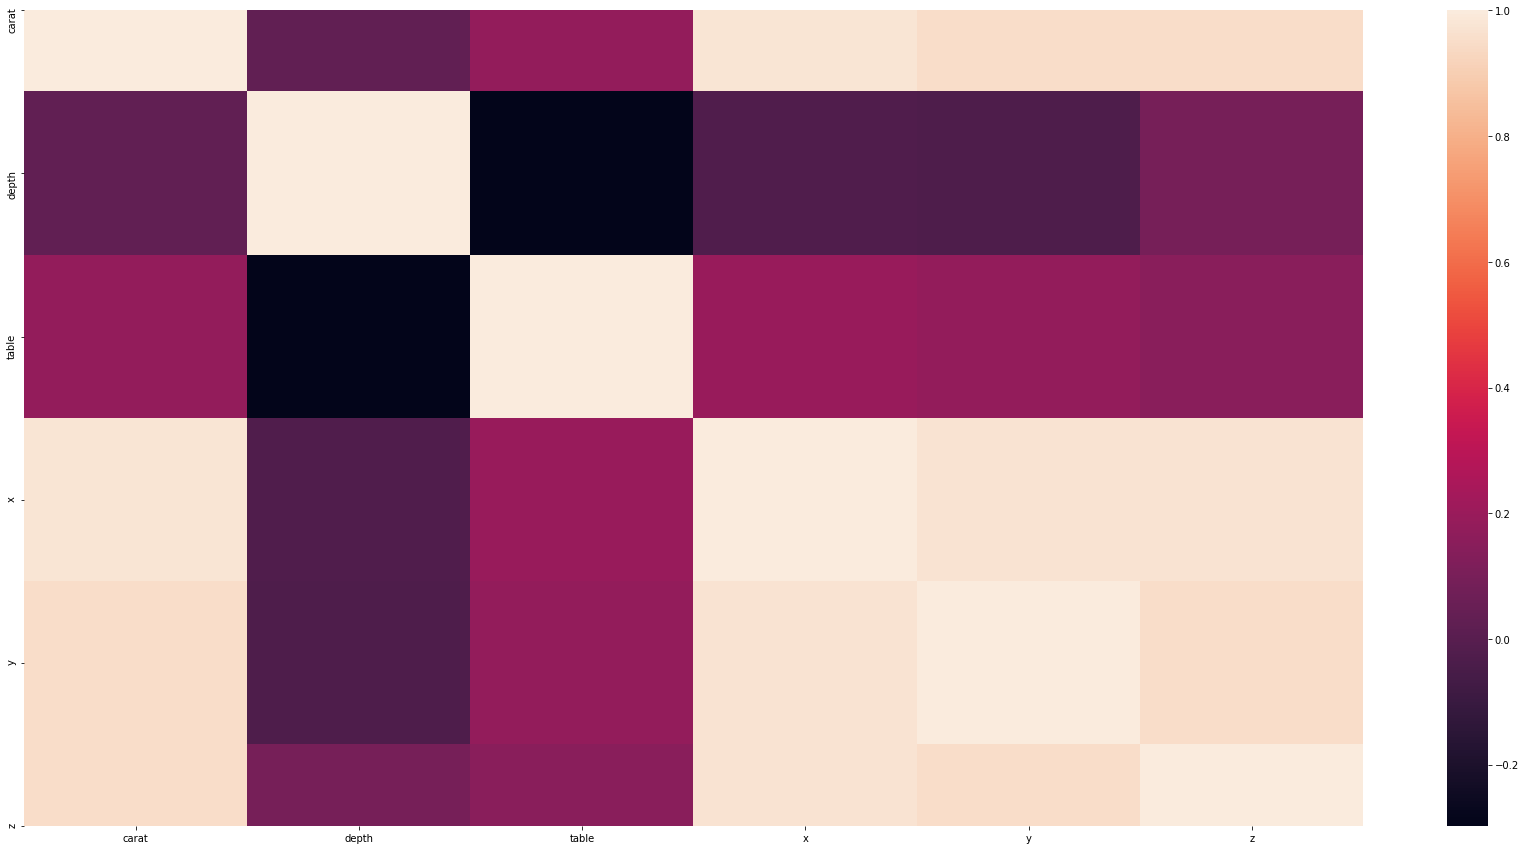

In [42]:
plt.subplots(figsize=(30,15))
sns.heatmap(df_new.corr())

# Preprocessing

- Are there any duplicated values?
- Do we need to do feature scaling?
- Do we need to generate new features?
- Split dataset into train and test sets. (0.7/0.3)

In [54]:
# Duplicated values are removed above.


In [71]:
float_columns=df_new.describe().columns

In [72]:
# Outliers with z score
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(df_new.loc[:, float_columns]))
outliers = list(set(np.where(z > 3)[0]))
len(outliers)

1367

In [73]:
df_new_2 = df_new.drop(df_new.index[outliers], inplace=False).reset_index(drop = False)
df_new_2.shape

(52231, 11)

In [74]:
# Label Encoding

df_new_2['cut'].replace({'Good':1, 
                          'Very Good':2,
                          'Fair':3,
                          'Ideal':4,
                          'Premium':5
                         }, inplace=True)

df_new_2['color'].replace({'J':1, 
                          'I':2,
                          'H':3,
                          'G':4,
                          'F':5,
                          'E':6,
                          'D':7
                         }, inplace=True)

df_new_2['clarity'].replace({'I1':1,
                          'SI1':2,
                          'SI2':3,
                          'VS1':4,
                          'VS2':5,
                          'VVS1':6,
                          'VVS2':7,
                          'IF':8
                         }, inplace=True)

In [75]:
df_new_2.head()

,index,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,0.23,4,6,3,61.5,55.0,3.95,3.98,2.43,Very Low
1,1,0.21,5,6,2,59.8,61.0,3.89,3.84,2.31,Very Low
2,3,0.29,5,2,5,62.4,58.0,4.20,4.23,2.63,Very Low
3,4,0.31,1,1,3,63.3,58.0,4.34,4.35,2.75,Very Low
4,5,0.24,2,1,7,62.8,57.0,3.94,3.96,2.48,Very Low


# ML Application

- Define models.
- Fit models.
- Evaluate models for both train and test dataset.
- Generate Confusion Matrix and scores of Accuracy, Recall, Precision and F1-Score.
- Analyse occurrence of overfitting and underfitting. If there is any of them, try to overcome it within a different section.

In [97]:
from sklearn.metrics import classification_report, confusion_matrix

In [76]:
X=df_new_2.drop(['price'], axis = 1)
y = df_new_2[['price']]

In [78]:
#scale data
from sklearn import preprocessing
X_s = preprocessing.scale(X)
X_s = pd.DataFrame(X_s, columns = X.columns) #converting scaled data into dataframe

In [79]:
X_s.head()

,index,carat,cut,color,clarity,depth,table,x,y,z
0,-1.731658,-1.227003,0.362151,0.928965,-0.624761,-0.193946,-1.132999,-1.602493,-1.588155,-1.618679
1,-1.731593,-1.271571,1.118560,0.928965,-1.190002,-1.531655,1.722235,-1.657458,-1.717213,-1.796917
2,-1.731465,-1.093298,1.118560,-1.433839,0.505720,0.514253,0.294618,-1.373472,-1.357696,-1.321617
3,-1.731401,-1.048729,-1.907076,-2.024540,-0.624761,1.222452,0.294618,-1.245220,-1.247075,-1.143379
4,-1.731337,-1.204718,-1.150667,-2.024540,1.636201,0.829008,-0.181254,-1.611654,-1.606592,-1.544414


In [86]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_s, y, test_size=0.3, random_state=42)

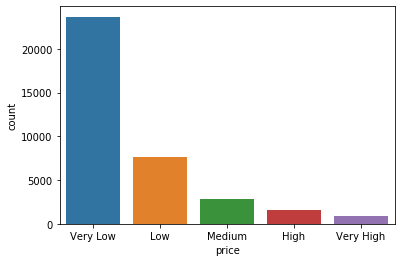

In [93]:
sns.countplot(x ='price', data = y_train)

In [95]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state = 14)
X_train_sm, y_train_sm = smote.fit_sample(X_train, y_train)

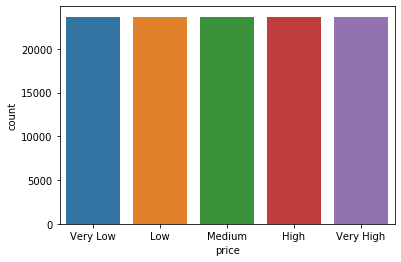

In [96]:
sns.countplot(x ='price', data = y_train_sm)

In [87]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
model_log = LogisticRegression(random_state = 42)
model_svc = SVC(kernel='linear')
model_tree = DecisionTreeClassifier(max_depth=10,random_state = 42)

In [99]:
# Logistic Regression
model_log.fit(X_train_sm,y_train_sm)

y_pred = model_log.predict(X_test)

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

        High       0.73      0.72      0.73       606
         Low       0.78      0.86      0.82      3305
      Medium       0.74      0.82      0.78      1177
   Very High       0.63      0.90      0.74       392
    Very Low       0.98      0.92      0.95     10190

    accuracy                           0.89     15670
   macro avg       0.77      0.84      0.80     15670
weighted avg       0.90      0.89      0.89     15670



In [100]:
# SVC
model_svc.fit(X_train_sm,y_train_sm)

y_pred = model_svc.predict(X_test)

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

        High       0.97      0.98      0.97       606
         Low       0.85      0.96      0.90      3305
      Medium       0.97      0.98      0.97      1177
   Very High       0.89      1.00      0.94       392
    Very Low       0.99      0.94      0.97     10190

    accuracy                           0.95     15670
   macro avg       0.93      0.97      0.95     15670
weighted avg       0.96      0.95      0.95     15670



In [101]:
# DecisionTreeClassifier

model_tree.fit(X_train_sm,y_train_sm)

y_pred = model_tree.predict(X_test)

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

        High       1.00      1.00      1.00       606
         Low       1.00      1.00      1.00      3305
      Medium       1.00      1.00      1.00      1177
   Very High       1.00      1.00      1.00       392
    Very Low       1.00      1.00      1.00     10190

    accuracy                           1.00     15670
   macro avg       1.00      1.00      1.00     15670
weighted avg       1.00      1.00      1.00     15670



In [104]:
print('model_log train score: ', model_log.score(X_train,y_train))
print('model_log test score: ', model_log.score(X_test,y_test))
print('*************************')
print('model_svc train score: ', model_svc.score(X_train,y_train))
print('model_svc test score: ', model_svc.score(X_test,y_test))
print('*************************')
print('model_tree train score: ', model_tree.score(X_train,y_train))
print('model_tree test score: ', model_tree.score(X_test,y_test))


model_log train score:  0.8872569131041274
model_log test score:  0.890810465858328
*************************
model_svc train score:  0.9506304532151746
model_svc test score:  0.9512444160816848
*************************
model_tree train score:  1.0
model_tree test score:  0.9998085513720485


# Evaluation

- Select the best performing model and write your comments about why choose this model.
- Analyse results and make comment about how you can improve model.

Decision Classifier seems to have the best results with 100% accuracy. 

To improve models the below can be done additional:
- Hyperparameters tuning
- Different kernels for SVM model
- Other classifiers (KNN, GaussianNB Discriminant Analysis can be tried
- Cross validation is also necessary
- Considering the high performance with decision tree I also need to consider the overfitting possibility

Additionally, I'll also try scaling only non-categorical data and without SMOTE balancing (even if that's most probably supported the model)
